In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2. Задати вершини довільного опуклого 8-кутника на площині. Зменшити його в 1,5 рази.

Задання вершин 

In [3]:
vertices = np.array([[3, 1], [6, 2], [7, 4], [7, 6], [6, 7], [4, 8], [2,6], [1,3]])

vertices = np.vstack([vertices, vertices[0]])

Зображення восьмикутника

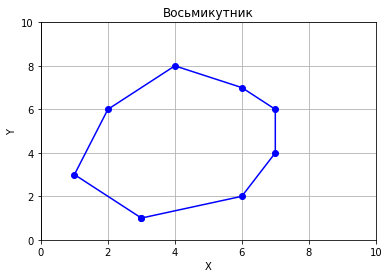

In [4]:
plt.figure()
plt.plot(vertices[:, 0], vertices[:, 1], marker='o', linestyle='-', color='blue')
plt.title('Восьмикутник')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.axhline(0, color='black',linewidth=0.7)
plt.axvline(0, color='black',linewidth=0.7)
plt.show()

Знаходження центру восьмикутника

In [5]:
center_x = np.mean(vertices[:, 0])
center_y = np.mean(vertices[:, 1])

Переміщення в центр координат

In [6]:
moved_vertices = vertices - np.array([center_x, center_y])


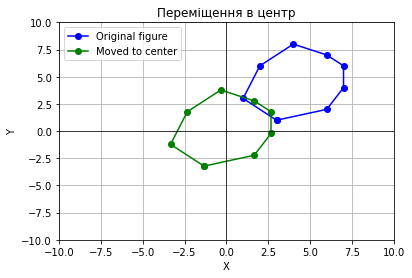

In [7]:
plt.figure()
plt.plot(vertices[:, 0], vertices[:, 1], marker='o', linestyle='-', color='blue', label='Original figure')
plt.plot(moved_vertices[:, 0], moved_vertices[:, 1], marker='o', linestyle='-', color='green',label='Moved to center' )
plt.title('Переміщення в центр')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black',linewidth=0.7)
plt.axvline(0, color='black',linewidth=0.7)
plt.legend()
plt.show()

Зменшення

In [8]:
scaling_factor = 1 / 1.5
vertices_scaled = moved_vertices * scaling_factor

Зменшення в матричному вигляді

In [9]:
# scaling_factor_m = np.array([[1/1.5, 0],
#                             [0, 1/1.5]])
# vertices_scaled_m = np.dot(moved_vertices, scaling_factor_m)

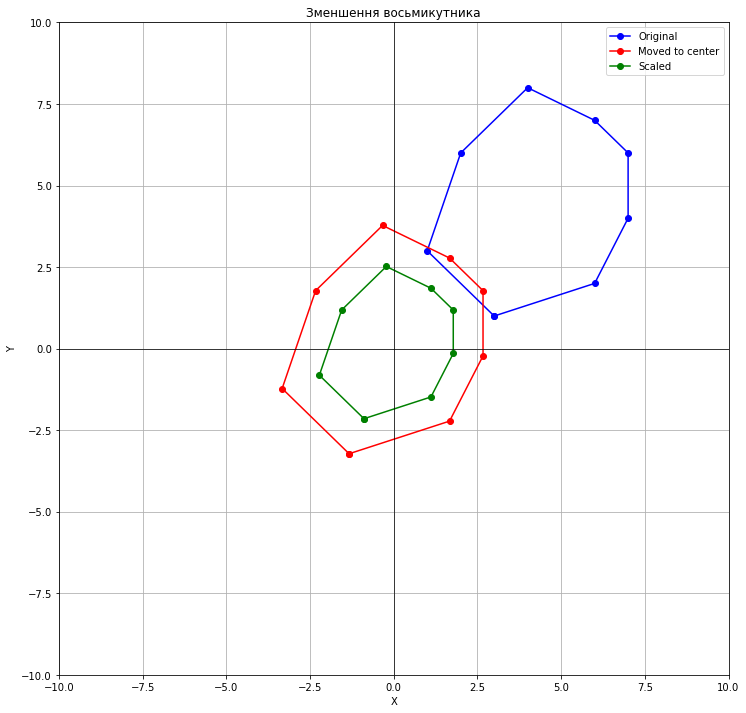

In [10]:
plt.figure(figsize=(12,12))
plt.plot(vertices[:, 0], vertices[:, 1], marker='o', linestyle='-', color='blue', label='Original')
plt.plot(moved_vertices[:, 0], moved_vertices[:, 1], marker='o', linestyle='-', color='red',label='Moved to center' )
plt.plot(vertices_scaled[:, 0], vertices_scaled[:, 1], marker='o', linestyle='-', color='green', label='Scaled')
# plt.plot(vertices_scaled_m[:, 0], vertices_scaled_m[:, 1], marker='o', linestyle='-', color='yellow', label='Scaled')
plt.title('Зменшення восьмикутника')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black',linewidth=0.7)
plt.axvline(0, color='black',linewidth=0.7)
plt.legend()
plt.show()

Перенесення назад і отримання фігури зменшеної в півтора рази

In [11]:
moved_vertices_2 = vertices_scaled + np.array([center_x, center_y])

In [12]:
vertices_test = vertices * 1/1.5

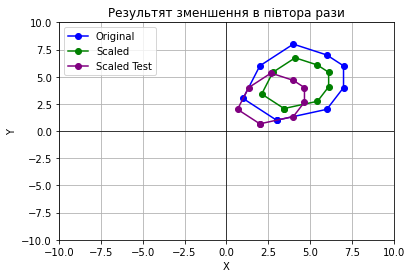

In [13]:
plt.figure()
plt.plot(vertices[:, 0], vertices[:, 1], marker='o', linestyle='-', color='blue', label='Original')
plt.plot(moved_vertices_2[:, 0], moved_vertices_2[:, 1], marker='o', linestyle='-', color='green', label='Scaled')
plt.plot(vertices_test[:, 0], vertices_test[:, 1], marker='o', linestyle='-', color='purple', label='Scaled Test')
plt.title('Результят зменшення в півтора рази')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black',linewidth=0.7)
plt.axvline(0, color='black',linewidth=0.7)
plt.legend()
plt.show()

# 3. Отриманий результат з попереднього пункту симетрично відобразити відносно початку координат.

In [14]:
vertices_with_ones = np.hstack([vertices, np.ones((vertices.shape[0], 1))])
moved_vertices_with_ones = np.hstack([moved_vertices_2, np.ones((vertices.shape[0], 1))])

In [15]:
symmetry_matrix = np.array([[np.cos(np.pi), -np.sin(np.pi), 1], 
                            [np.sin(np.pi), np.cos(np.pi), 0], 
                            [0, 0, 1]]) # [[-1, 0, 1], [0, -1, 0], [0, 0, 1]]
vertices_symmetric = np.dot(moved_vertices_with_ones, symmetry_matrix)

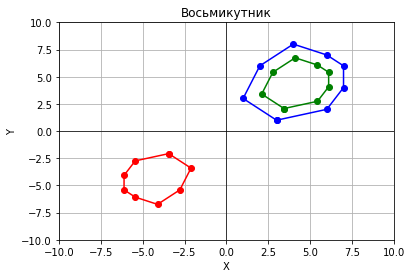

In [16]:
plt.figure()
plt.plot(vertices[:, 0], vertices[:, 1], marker='o', linestyle='-', color='blue')
plt.plot(vertices_symmetric[:, 0], vertices_symmetric[:, 1], marker='o', linestyle='-', color='red')
plt.plot(moved_vertices_2[:, 0], moved_vertices_2[:, 1], marker='o', linestyle='-', color='green')
plt.title('Восьмикутник')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black',linewidth=0.7)
plt.axvline(0, color='black',linewidth=0.7)
plt.show()

# 4. Задати похилу пряму двома точками на площині. Симетрично відобразити 8-кутник відносно даної прямої. Вказати перетворення, які для цього необхідні.

$$\begin{gathered}\frac{x-x_A}{x_B-x_A}=\frac{y-y_A}{y_B-y_A} \\ y-y_A=\frac{y_B-y_A}{x_B-x_A}\left(x-x_A\right) \\ y=\frac{y_B-y_A}{x_B-x_A} x+y_A-\frac{y_B-y_A}{x_B-x_A} x_A \\ k=\frac{y_B-y_A}{x_B-x_A} ; b=y_A-\frac{y_B-y_A}{x_B-x_A} x_A^{\prime} ; \\ \varphi=\operatorname{arctg} k\end{gathered}$$

In [17]:
# Задаємо дві точки, через які проходить пряма
point1 = np.array([2, 1])
point2 = np.array([8, 5.5])

k = (point2[1] - point1[1]) / (point2[0] - point1[0])
b = point1[1] - k*point1[0]
phi = np.arctan(k)

$$\begin{gathered}M_1=\left[\begin{array}{ccc}1 & 0 & 0 \\ 0 & 1 & -b \\ 0 & 0 & 1\end{array}\right], \\ M_2=\left[\begin{array}{ccc}\cos (-\varphi) & -\sin (-\varphi) & 0 \\ \sin \left(-\varphi\right) & \cos (-\varphi) & 0 \\ 0 & 0 & 1\end{array}\right] , \\ M_3=\left[\begin{array}{ccc}1 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & 1\end{array}\right], \\ M_4=\left[\begin{array}{ccc}\cos \varphi & -\sin \varphi & 0 \\ \sin \varphi & \cos \varphi & 0 \\ 0 & 0 & 1\end{array}\right], \\ M_5=\left[\begin{array}{ccc}1 & 0 & 0 \\ 0 & 1 & b \\ 0 & 0 & 1\end{array}\right]\end{gathered}$$

In [18]:
#M_full = np.dot(np.dot(np.dot(np.dot(M1.T,M2.T),M3.T),M4.T),M5.T)

$\left(\begin{array}{ccc}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & -b & 1\end{array}\right) *\left(\begin{array}{ccc}\cos (a) & -\sin (a) & 0 \\ \sin (a) & \cos (a) & 0 \\ 0 & 0 & 1\end{array}\right) =\left(\begin{array}{ccc}\cos (\alpha) & -\sin (\alpha) & 0 \\ \sin (\alpha) & \cos (\alpha) & 0 \\ -b \sin (\alpha) & -b \cos (\alpha) & 1\end{array}\right)$

$\left(\begin{array}{ccc}\cos (a) & -\sin (a) & 0 \\ \sin (a) & \cos (a) & 0 \\ -(b \sin (a)) & -(b \cos (a)) & 1\end{array}\right) *\left(\begin{array}{ccc}1 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & 1\end{array}\right) \quad=\left(\begin{array}{ccc}\cos (\alpha) & \sin (\alpha) & 0 \\ \sin (\alpha) & -\cos (\alpha) & 0 \\ -b \sin (\alpha) & b \cos (\alpha) & 1\end{array}\right)$

$\left(\begin{array}{ccc}\cos (a) & \sin (a) & 0 \\ \sin (a) & -\cos (a) & 0 \\ -(b \sin (a)) & b \cos (a) & 1\end{array}\right) *\left(\begin{array}{ccc}\cos (a) & \sin (a) & 0 \\ -\sin (a) & \cos (a) & 0 \\ 0 & 0 & 1\end{array}\right)=\left(\begin{array}{ccc}\cos ^2(\alpha)-\sin ^2(\alpha) & 2 \sin (\alpha) \cos (\alpha) & 0 \\ 2 \sin (\alpha) \cos (\alpha) & \sin ^2(\alpha)-\cos ^2(\alpha) & 0 \\ -2 b \sin (\alpha) \cos (\alpha) & b \cos ^2(\alpha)-b \sin ^2(\alpha) & 1\end{array}\right)$

$\left(\begin{array}{ccc}\cos (a)^2-\sin (a)^2 & 2 \cos (a) \sin (a) & 0 \\ 2 \cos (a) \sin (a) & -\cos (a)^2+\sin (a)^2 & 0 \\ -2 b \cos (a) \sin (a) & b \cos (a)^2-b \sin (a)^2 & 1\end{array}\right) *\left(\begin{array}{lll}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & b & 1\end{array}\right)=\left(\begin{array}{ccc}\cos ^2(\alpha)-\sin ^2(\alpha) & 2 \sin (\alpha) \cos (\alpha) & 0 \\ 2 \sin (\alpha) \cos (\alpha) & \sin ^2(\alpha)-\cos ^2(\alpha) & 0 \\ -2 b \sin (\alpha) \cos (\alpha) & -b \sin ^2(\alpha)+b \cos ^2(\alpha)+b & 1\end{array}\right)$

In [19]:
#M_full_res = np.dot(vertices_with_ones, M_full)

### Зсув по осі Y

In [20]:
M1 = np.array([[1, 0, 0], 
               [0, 1, -b], 
               [0, 0, 1]])

In [21]:
M1_res = np.dot(vertices_with_ones, M1.T)

In [22]:
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

In [23]:
t = np.vstack((point1, point2))
line = np.hstack([t, np.ones((t.shape[0], 1))])
new_line1 = np.dot(line, M1.T)

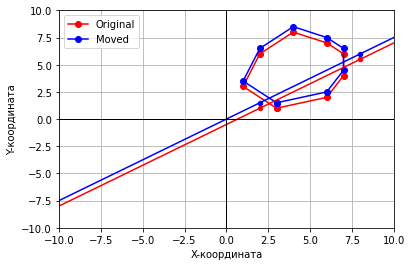

In [24]:
# Візуалізація
plt.figure()

# Фігура, що була
plt.plot(vertices_with_ones[:, 0], vertices_with_ones[:, 1], label='Original', marker='o', linestyle='-', color='red')

#Зміщена фігура
plt.plot(M1_res[:, 0], M1_res[:, 1], label='Moved', marker='o', linestyle='-', color='blue')

# Лінія, що була
plt.scatter(x_values, y_values, color='red', s=20)
plt.axline((x_values[0], y_values[0]),slope = k , color='red')

# Зміщена лінія
plt.scatter(new_line1[:, 0], new_line1[:, 1], color='blue', s=20)
plt.axline((new_line1[0,0], new_line1[0,1]),(new_line1[1,0],new_line1[1,1]) , color='blue')


plt.xlabel('X-координата')
plt.ylabel('Y-координата')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.show()

### Поворот за годинниковою стрілкою

In [25]:
M2 = np.array([[np.cos(-phi), -np.sin(-phi), 0], 
               [np.sin(-phi), np.cos(-phi), 0], 
               [0, 0, 1]])

In [26]:
M2_res = np.dot(M1_res, M2.T)

In [27]:
new_line2 = np.dot(new_line1, M2.T)

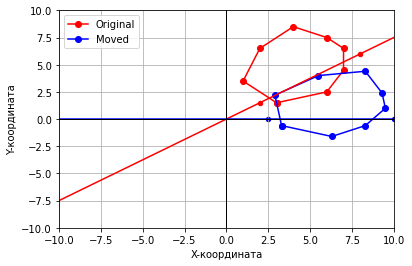

In [28]:
# Візуалізація
plt.figure()

# Фігура, що була
plt.plot(M1_res[:, 0], M1_res[:, 1], label='Original', marker='o', linestyle='-', color='red')

#Зміщена фігура
plt.plot(M2_res[:, 0], M2_res[:, 1], label='Moved', marker='o', linestyle='-', color='blue')

# Лінія, що була
plt.scatter(new_line1[:, 0], new_line1[:, 1], color='red', s=20)
plt.axline((new_line1[0,0], new_line1[0,1]),(new_line1[1,0],new_line1[1,1]) , color='red')

# Зміщена лінія
plt.scatter(new_line2[:, 0], new_line2[:, 1], color='blue', s=20)
plt.axline((new_line2[0,0], new_line2[0,1]),(new_line2[1,0],new_line2[1,1]) , color='blue')


plt.xlabel('X-координата')
plt.ylabel('Y-координата')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.show()

### Робимо симетрію відносно X

In [29]:
M3 = np.array([[1, 0, 0], 
               [0, -1, 0], 
               [0, 0, 1]])
M3_res = np.dot(M2_res, M3.T)

In [58]:
new_line3

array([[ 2.50000000e+00, -2.22044605e-16,  1.00000000e+00],
       [ 1.00000000e+01, -8.88178420e-16,  1.00000000e+00]])

In [31]:
new_line3 = np.dot(new_line2, M3.T)

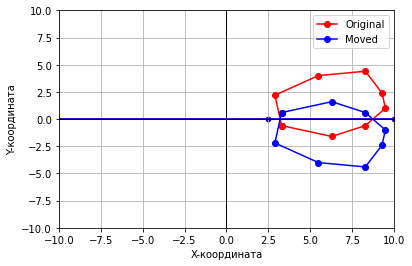

In [32]:
# Візуалізація
plt.figure()

# Фігура, що була
plt.plot(M2_res[:, 0], M2_res[:, 1], label='Original', marker='o', linestyle='-', color='red')

#Зміщена фігура
plt.plot(M3_res[:, 0], M3_res[:, 1], label='Moved', marker='o', linestyle='-', color='blue')

# Лінія, що була
plt.scatter(new_line2[:, 0], new_line2[:, 1], color='red', s=20)
plt.axline((new_line2[0,0], new_line2[0,1]),(new_line2[1,0],new_line2[1,1]) , color='red')

# Зміщена лінія
plt.scatter(new_line3[:, 0], new_line3[:, 1], color='blue', s=20)
plt.axline((new_line3[0,0], new_line3[0,1]),(new_line3[1,0],new_line3[1,1]) , color='blue')

plt.xlabel('X-координата')
plt.ylabel('Y-координата')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.show()

### Повертаємо проти годинникової стрілки

In [33]:
M4 = np.array([[np.cos(phi), -np.sin(phi), 0], 
               [np.sin(phi), np.cos(phi), 0], 
               [0, 0, 1]])
M4_res = np.dot(M3_res, M4.T)

In [34]:
new_line4 = np.dot(new_line3, M4.T)

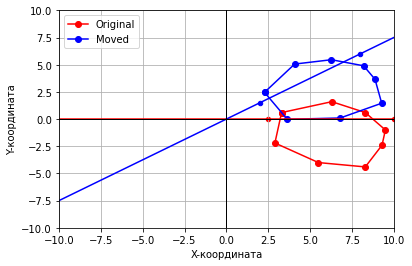

In [35]:
# Візуалізація
plt.figure()

# Фігура, що була
plt.plot(M3_res[:, 0], M3_res[:, 1], label='Original', marker='o', linestyle='-', color='red')

#Зміщена фігура
plt.plot(M4_res[:, 0], M4_res[:, 1], label='Moved', marker='o', linestyle='-', color='blue')

# Лінія, що була
plt.scatter(new_line3[:, 0], new_line3[:, 1], color='red', s=20)
plt.axline((new_line3[0,0], new_line3[0,1]),(new_line3[1,0],new_line3[1,1]) , color='red')

# Зміщена лінія
plt.scatter(new_line4[:, 0], new_line4[:, 1], color='blue', s=20)
plt.axline((new_line4[0,0], new_line4[0,1]),(new_line4[1,0],new_line4[1,1]) , color='blue')


plt.xlabel('X-координата')
plt.ylabel('Y-координата')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.show()

### Зсув по осі Y в зворотню сторону

In [36]:
M5 = np.array([[1, 0, 0],
               [0, 1, b], 
               [0, 0, 1]])
M5_res = np.dot(M4_res, M5.T)

In [37]:
new_line5 = np.dot(new_line4, M5.T)

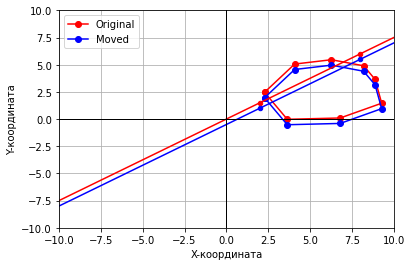

In [38]:
# Візуалізація
plt.figure()

# Фігура, що була
plt.plot(M4_res[:, 0], M4_res[:, 1], label='Original', marker='o', linestyle='-', color='red')

#Зміщена фігура
plt.plot(M5_res[:, 0], M5_res[:, 1], label='Moved', marker='o', linestyle='-', color='blue')

# Лінія, що була
plt.scatter(new_line4[:, 0], new_line4[:, 1], color='red', s=20)
plt.axline((new_line4[0,0], new_line4[0,1]),(new_line4[1,0],new_line4[1,1]) , color='red')

# Зміщена лінія
plt.scatter(new_line5[:, 0], new_line5[:, 1], color='blue', s=20)
plt.axline((new_line5[0,0], new_line5[0,1]),(new_line5[1,0],new_line5[1,1]) , color='blue')

plt.xlabel('X-координата')
plt.ylabel('Y-координата')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.show()

### Результат

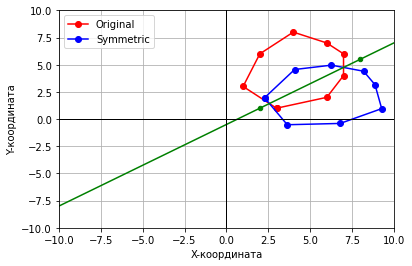

In [39]:
# Візуалізація
plt.figure()

# Оригінальна фігура
plt.plot(vertices_with_ones[:, 0], vertices_with_ones[:, 1], label='Original', marker='o', linestyle='-', color='red')

# Симетрично відображена фігура
plt.plot(M5_res[:, 0], M5_res[:, 1], label='Symmetric', marker='o', linestyle='-', color='blue')
# plt.plot(M_full_res[:, 0], M_full_res[:, 1], label='Symmetric', marker='o', linestyle='-', color='purple')
# Лінія
plt.scatter(x_values, y_values, color='green', s=20)
plt.axline((x_values[0], y_values[0]),slope = k , color='green')

plt.xlabel('X-координата')
plt.ylabel('Y-координата')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.show()

# 6. Виконати пункти 2–4 для одного будь-якого графічного об’єкту, який подано в xlsx-файлі.

In [40]:
excel_file_path = "Варіанти (1).xlsx"
df = pd.read_excel(excel_file_path, sheet_name=2)

In [41]:
data = df[["X","Y"]].to_numpy()
data

array([[105.645,  97.737],
       [105.607,  97.776],
       [105.554,  97.761],
       ...,
       [139.071,  96.903],
       [137.634,  99.723],
       [137.622, 100.13 ]])

Центр фігури

In [42]:
center_x_data = np.mean(data[:, 0])
center_y_data = np.mean(data[:, 1])

Перенесення в початок координат

In [43]:
moved_vertices_data = data - np.array([center_x_data, center_y_data])

Зменшення в півтора рази

In [44]:
scaling_factor_data = 1 / 1.5
vertices_scaled_data = moved_vertices_data * scaling_factor_data

Переміщення в зворотню сторону

In [45]:
moved_vertices_2_data = vertices_scaled_data + np.array([center_x_data, center_y_data])

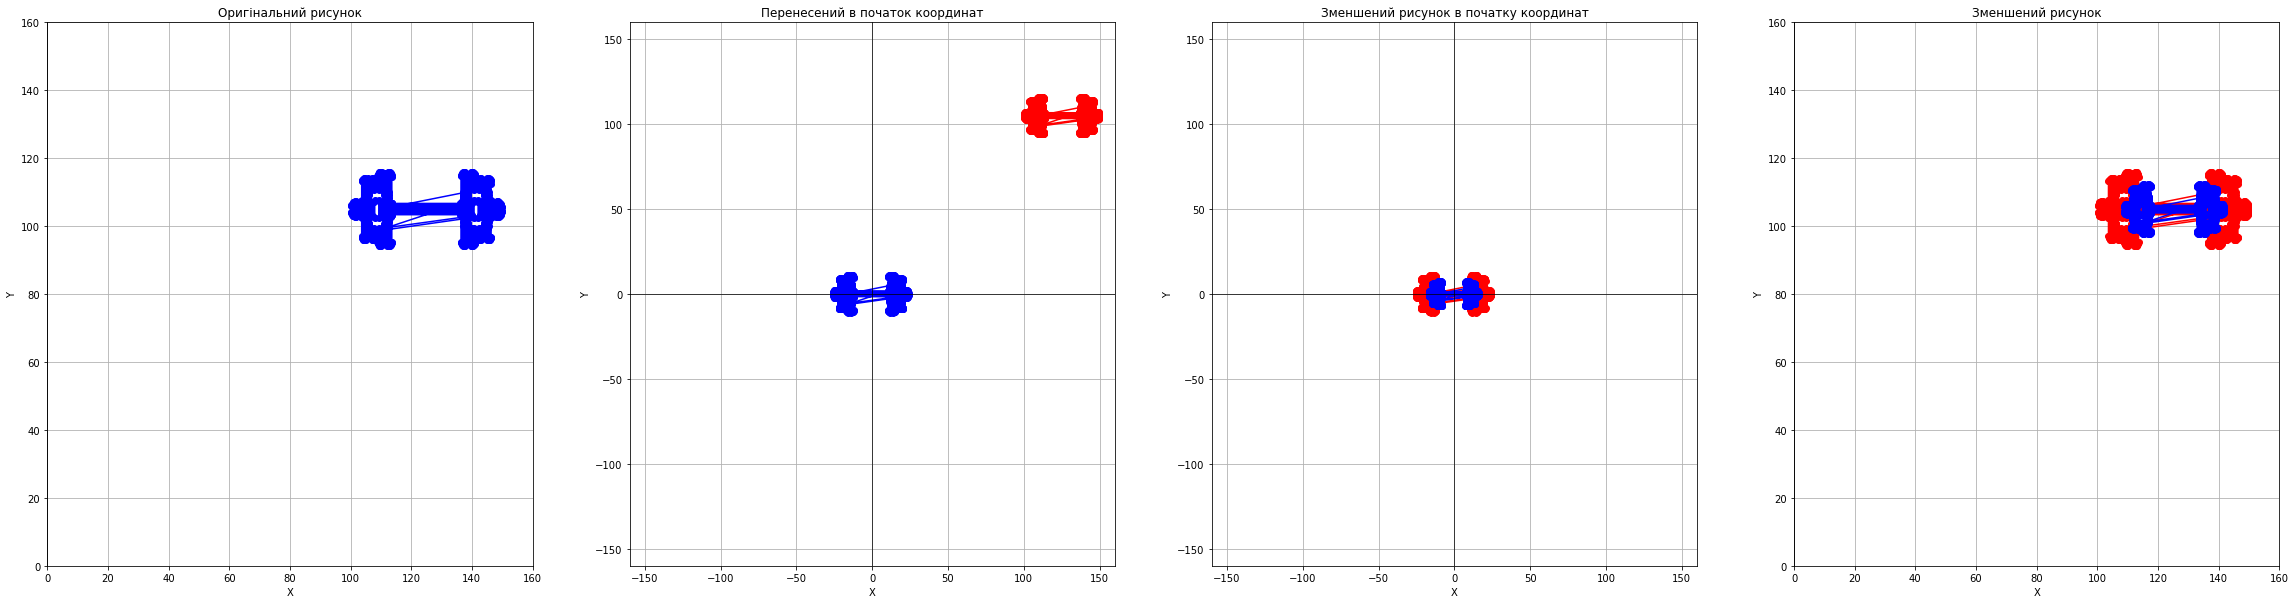

In [46]:
# Візуалізація
fig, axs = plt.subplots(1, 4, figsize=(40, 10))

axs[0].plot(data[:, 0], data[:, 1], marker='o', linestyle='-', color='blue')
axs[0].set_title('Оригінальний рисунок')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].grid(True)
axs[0].set_xlim(0, 160)
axs[0].set_ylim(0, 160)
axs[0].axhline(0, color='black', linewidth=0.7)
axs[0].axvline(0, color='black', linewidth=0.7)

axs[1].plot(moved_vertices_data[:, 0], moved_vertices_data[:, 1], marker='o', linestyle='-', color='blue')
axs[1].plot(data[:, 0], data[:, 1], marker='o', linestyle='-', color='red')
axs[1].set_title('Перенесений в початок координат')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].grid(True)
axs[1].set_xlim(-160, 160)
axs[1].set_ylim(-160, 160)
axs[1].axhline(0, color='black', linewidth=0.7)
axs[1].axvline(0, color='black', linewidth=0.7)

axs[2].plot(moved_vertices_data[:, 0], moved_vertices_data[:, 1], marker='o', linestyle='-', color='red')
axs[2].plot(vertices_scaled_data[:, 0], vertices_scaled_data[:, 1], marker='o', linestyle='-', color='blue')
axs[2].set_title('Зменшений рисунок в початку координат')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
axs[2].grid(True)
axs[2].set_xlim(-160, 160)
axs[2].set_ylim(-160, 160)
axs[2].axhline(0, color='black', linewidth=0.7)
axs[2].axvline(0, color='black', linewidth=0.7)

axs[3].plot(data[:, 0], data[:, 1], marker='o', linestyle='-', color='red')
axs[3].plot(moved_vertices_2_data[:, 0], moved_vertices_2_data[:, 1], marker='o', linestyle='-', color='blue')
axs[3].set_title('Зменшений рисунок')
axs[3].set_xlabel('X')
axs[3].set_ylabel('Y')
axs[3].grid(True)
axs[3].set_xlim(0, 160)
axs[3].set_ylim(0, 160)
axs[3].axhline(0, color='black', linewidth=0.7)
axs[3].axvline(0, color='black', linewidth=0.7)

plt.show()


### Симетрія відносно центра координат

In [47]:
symmetry_matrix = np.array([[-1, 0], 
                            [0, -1]])
vertices_symmetric_data = np.dot(moved_vertices_2_data, symmetry_matrix)

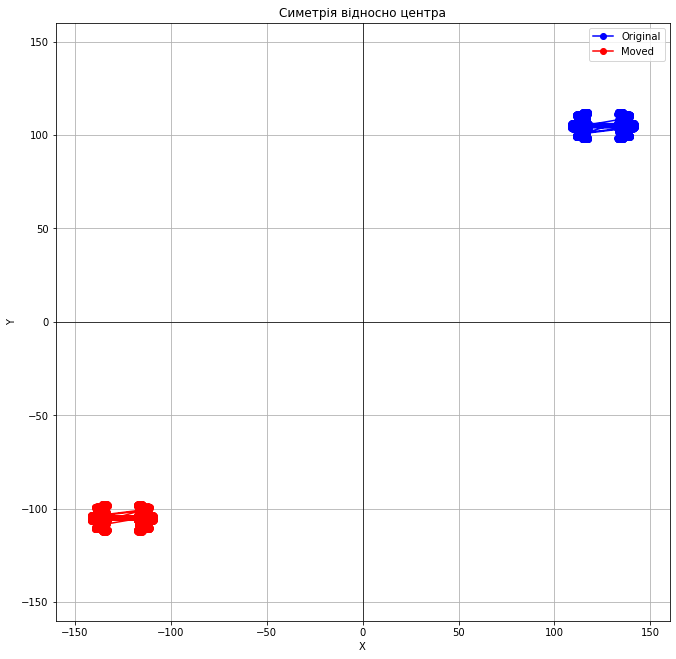

In [48]:
plt.figure(figsize=(11, 11))
plt.plot(moved_vertices_2_data[:, 0], moved_vertices_2_data[:, 1], marker='o', linestyle='-', color='blue', label='Original')
plt.plot(vertices_symmetric_data[:, 0], vertices_symmetric_data[:, 1], marker='o', linestyle='-', color='red', label='Moved')
plt.title('Симетрія відносно центра')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.xlim(-160, 160)
plt.ylim(-160, 160)
plt.axhline(0, color='black',linewidth=0.7)
plt.axvline(0, color='black',linewidth=0.7)
plt.legend()
plt.show()

### Симетрія відносно прямої

In [49]:
# Задаємо дві точки, через які проходить пряма
point1_data = np.array([50, 100])
point2_data = np.array([100, 150])

k_data = (point2_data[1] - point1_data[1]) / (point2_data[0] - point1_data[0])
b_data = point1_data[1] - k_data*point1_data[0]
phi_data = np.arctan(k_data)

In [50]:
data_with_ones = np.hstack([data, np.ones((data.shape[0], 1))])

In [51]:
x_values_data = [point1_data[0], point2_data[0]]
y_values_data = [point1_data[1], point2_data[1]]

In [52]:
M1_data = np.array([[1, 0, 0], 
                    [0, 1, -b_data], 
                    [0, 0, 1]])
M2_data = np.array([[np.cos(-phi_data), -np.sin(-phi_data), 0], 
                    [np.sin(-phi_data), np.cos(-phi_data), 0], 
                    [0, 0, 1]])
M3_data = np.array([[1, 0, 0], 
                    [0, -1, 0], 
                    [0, 0, 1]])
M4_data = np.array([[np.cos(phi_data), -np.sin(phi_data), 0], 
                    [np.sin(phi_data), np.cos(phi_data), 0], 
                    [0, 0, 1]])
M5_data = np.array([[1, 0, 0],
                    [0, 1, b_data], 
                    [0, 0, 1]])

In [53]:
M1_res_data = np.dot(data_with_ones, M1_data.T)
M2_res_data = np.dot(M1_res_data, M2_data.T)
M3_res_data = np.dot(M2_res_data, M3_data.T)
M4_res_data = np.dot(M3_res_data, M4_data.T)
M5_res_data = np.dot(M4_res_data, M5_data.T)

In [54]:
t_data = np.vstack((point1_data, point2_data))
line_data = np.hstack([t_data, np.ones((t_data.shape[0], 1))])

In [55]:
new_line1_data = np.dot(line_data, M1_data.T)
new_line2_data = np.dot(new_line1_data, M2_data.T)
new_line3_data = np.dot(new_line2_data, M3_data.T)
new_line4_data = np.dot(new_line3_data, M4_data.T)
new_line5_data = np.dot(new_line4_data, M5_data.T)

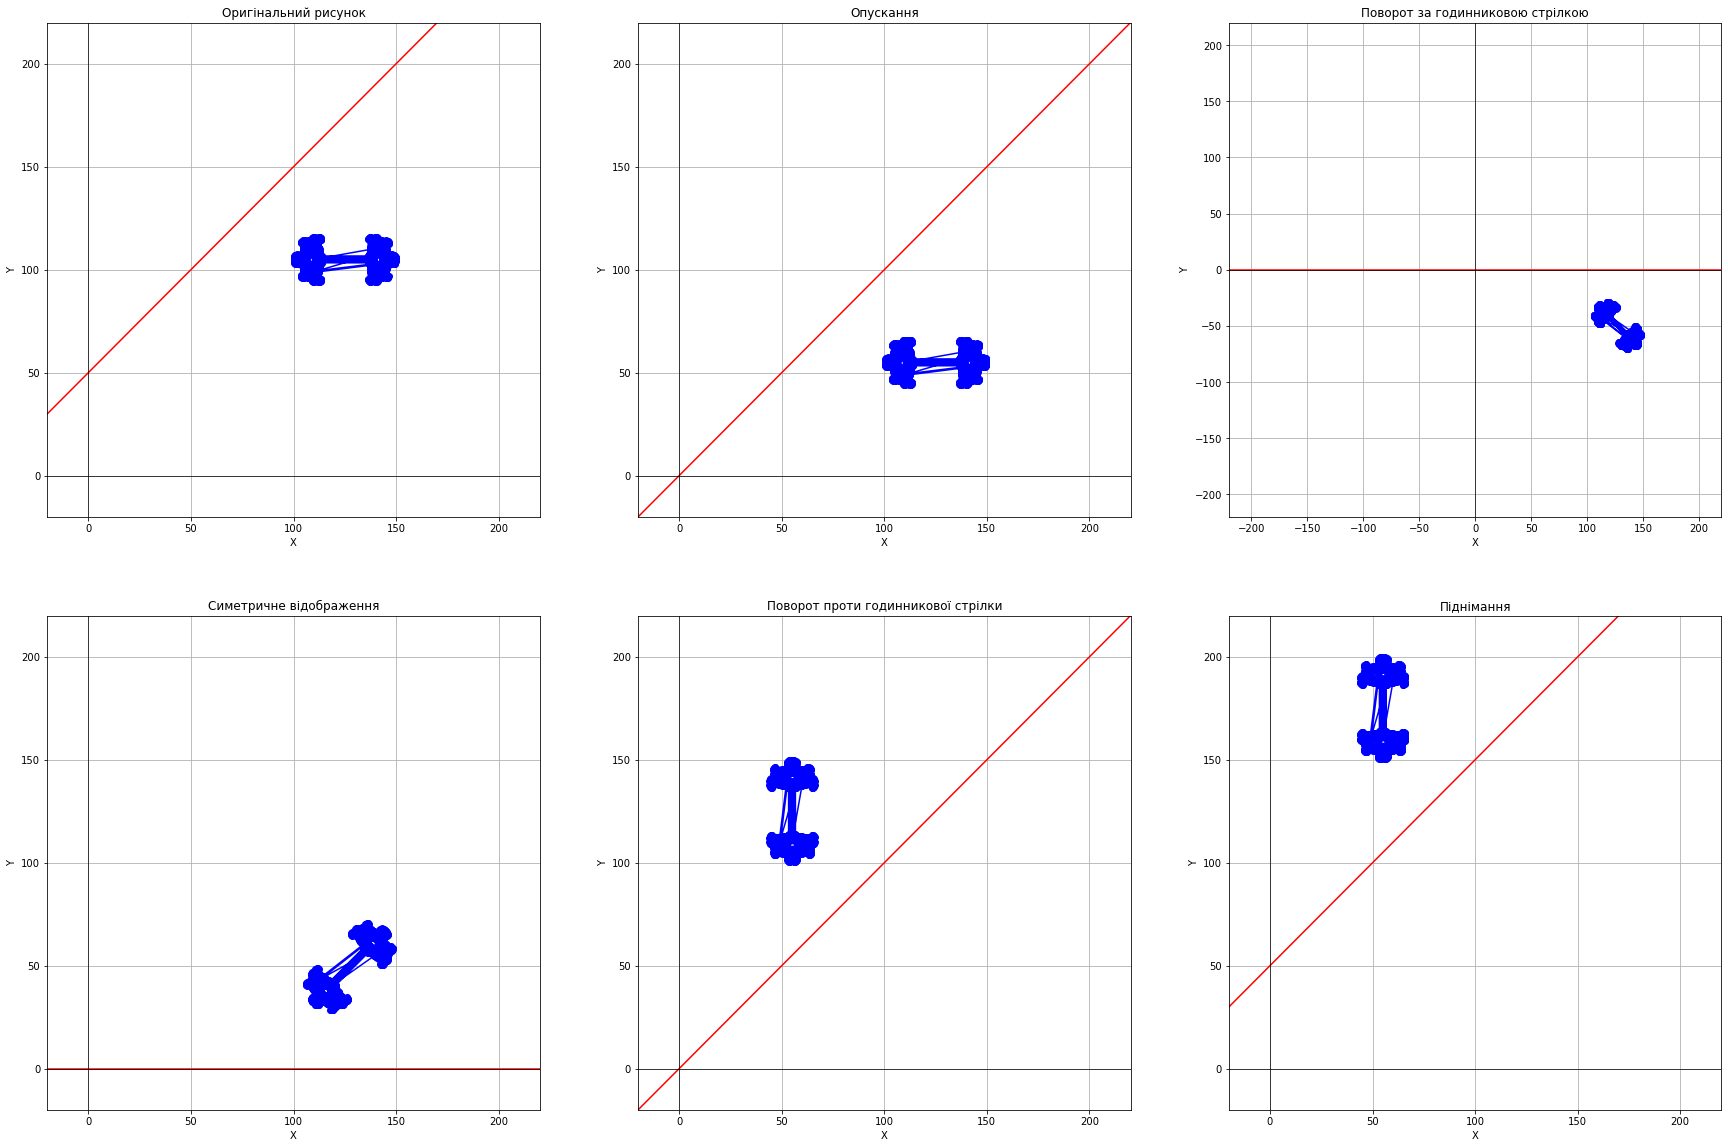

In [56]:
# Візуалізація
fig, axs = plt.subplots(2, 3, figsize=(30, 20))

axs[0,0].plot(data[:, 0], data[:, 1], marker='o', linestyle='-', color='blue')
axs[0,0].axline((line_data[0,0], line_data[0,1]),(line_data[1,0],line_data[1,1]) , color='red')
axs[0,0].set_title('Оригінальний рисунок')
axs[0,0].set_xlabel('X')
axs[0,0].set_ylabel('Y')
axs[0,0].grid(True)
axs[0,0].set_xlim(-20, 220)
axs[0,0].set_ylim(-20, 220)
axs[0,0].axhline(0, color='black', linewidth=0.7)
axs[0,0].axvline(0, color='black', linewidth=0.7)

axs[0,1].plot(M1_res_data[:, 0], M1_res_data[:, 1], marker='o', linestyle='-', color='blue')
axs[0,1].axline((new_line1_data[0,0], new_line1_data[0,1]),(new_line1_data[1,0],new_line1_data[1,1]) , color='red')
axs[0,1].set_title('Опускання')
axs[0,1].set_xlabel('X')
axs[0,1].set_ylabel('Y')
axs[0,1].grid(True)
axs[0,1].set_xlim(-20, 220)
axs[0,1].set_ylim(-20, 220)
axs[0,1].axhline(0, color='black', linewidth=0.7)
axs[0,1].axvline(0, color='black', linewidth=0.7)

axs[0,2].plot(M2_res_data[:, 0], M2_res_data[:, 1], marker='o', linestyle='-', color='blue')
axs[0,2].axline((new_line2_data[0,0], new_line2_data[0,1]),(new_line2_data[1,0],new_line2_data[1,1]) , color='red')
axs[0,2].set_title('Поворот за годинниковою стрілкою')
axs[0,2].set_xlabel('X')
axs[0,2].set_ylabel('Y')
axs[0,2].grid(True)
axs[0,2].set_xlim(-220, 220)
axs[0,2].set_ylim(-220, 220)
axs[0,2].axhline(0, color='black', linewidth=0.7)
axs[0,2].axvline(0, color='black', linewidth=0.7)

axs[1,0].plot(M3_res_data[:, 0], M3_res_data[:, 1], marker='o', linestyle='-', color='blue')
axs[1,0].axline((new_line3_data[0,0], new_line3_data[0,1]),(new_line3_data[1,0],new_line3_data[1,1]) , color='red')
axs[1,0].set_title('Симетричне відображення')
axs[1,0].set_xlabel('X')
axs[1,0].set_ylabel('Y')
axs[1,0].grid(True)
axs[1,0].set_xlim(-20, 220)
axs[1,0].set_ylim(-20, 220)
axs[1,0].axhline(0, color='black', linewidth=0.7)
axs[1,0].axvline(0, color='black', linewidth=0.7)

axs[1,1].plot(M4_res_data[:, 0], M4_res_data[:, 1], marker='o', linestyle='-', color='blue')
axs[1,1].axline((new_line4_data[0,0], new_line4_data[0,1]),(new_line4_data[1,0],new_line4_data[1,1]) , color='red')
axs[1,1].set_title('Поворот проти годинникової стрілки')
axs[1,1].set_xlabel('X')
axs[1,1].set_ylabel('Y')
axs[1,1].grid(True)
axs[1,1].set_xlim(-20, 220)
axs[1,1].set_ylim(-20, 220)
axs[1,1].axhline(0, color='black', linewidth=0.7)
axs[1,1].axvline(0, color='black', linewidth=0.7)

axs[1,2].plot(M5_res_data[:, 0], M5_res_data[:, 1], marker='o', linestyle='-', color='blue')
axs[1,2].axline((new_line5_data[0,0], new_line5_data[0,1]),(new_line5_data[1,0],new_line5_data[1,1]) , color='red')
axs[1,2].set_title('Піднімання')
axs[1,2].set_xlabel('X')
axs[1,2].set_ylabel('Y')
axs[1,2].grid(True)
axs[1,2].set_xlim(-20, 220)
axs[1,2].set_ylim(-20, 220)
axs[1,2].axhline(0, color='black', linewidth=0.7)
axs[1,2].axvline(0, color='black', linewidth=0.7)

plt.show()

Результат

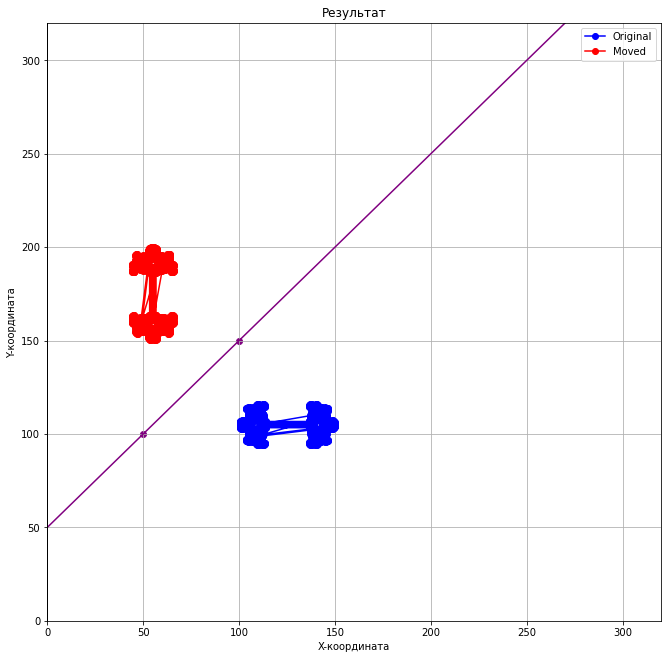

In [57]:
# Візуалізація
plt.figure(figsize=(11,11))

plt.plot(data_with_ones[:, 0], data_with_ones[:, 1], label='Original', marker='o', linestyle='-', color='blue')
plt.plot(M5_res_data[:, 0], M5_res_data[:, 1], label='Moved', marker='o', linestyle='-', color='red')

plt.scatter(x_values_data, y_values_data, color='purple')
plt.axline((x_values_data[0], y_values_data[0]),slope = k_data , color='purple')

plt.xlabel('X-координата')
plt.ylabel('Y-координата')
plt.xlim(0, 320)
plt.ylim(0, 320)
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Результат')
plt.legend()
plt.show()